In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

In [2]:
## Import data
df = pd.read_csv("../input/languoid.csv")
df_geo = pd.read_csv("../input/languages-and-dialects-geo.csv")

## Drop columns I won't be using
df = df.drop(['description', 'markup_description', 'jsondata', 'hid'], axis = 1)

In [3]:
# ## Compare number of rows of df and df_geo
# print("df rows:    ", df.shape[0])
# print("df_geo rows:", df_geo.shape[0])

In [4]:
# ## Creating df_fam and updating df
# df_fam = df[df['level'] == 'family'].reset_index().drop(['index'], axis = 1)
# df = df[df['level'] != 'family'].reset_index().drop(['index'], axis = 1)

In [5]:
# ## Compare outputs of describe() between df and df_geo
# print(df.id.describe())
# print(df_geo.id.describe())

In [6]:
# ## Sort them and merge df_geo.macroarea into df
# df.sort_values('id', inplace = True)
# df_geo.sort_values('id', inplace = True)
# df = pd.concat([df, df_geo.macroarea], axis = 1)

In [7]:
df_geo = df_geo[['latitude', 'longitude', 'macroarea']]
# df_macro = df_geo[['macroarea', 'latitude', 'longitude']].dropna()

# df_macro = df[['latitude', 'longitude', 'macroarea']].dropna()
areas = list(df_geo.macroarea.dropna().unique())
area_c = ['#19BC9D','#E84C3D','#3297DB','#9A59B5','#F1C50E','#E77E22']
area_v = []

for a in areas:
    area_v.append(df_geo[df_geo['macroarea'] == a])

areas

['Papunesia',
 'Africa',
 'Eurasia',
 'South America',
 'North America',
 'Australia']

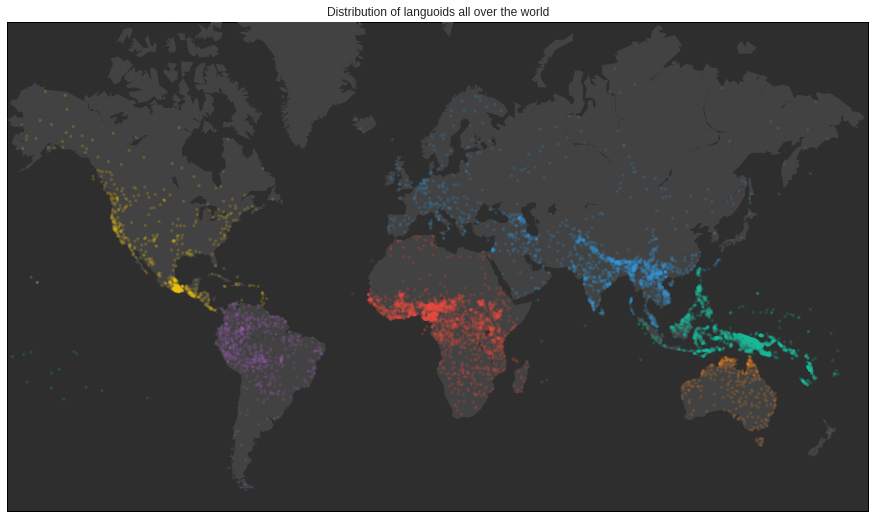

In [8]:
west, east = -168, 192
south,north = -60, 78

cont_color = '#424242'
sea_color = '#2E2E2E'

fig = plt.figure(figsize=(16,9))
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, resolution='c')
m.drawmapboundary(fill_color= sea_color, zorder= 0);
m.fillcontinents(color= cont_color, zorder = 1);

for i in range(len(areas)):
    x, y = m(area_v[i]['longitude'].values,
             area_v[i]['latitude'].values)
    m.scatter(x, y,
              zorder=2,
              alpha = .2,
              c = area_c[i],
              edgecolors= 'none',
              s = 10);
plt.title("Distribution of languoids all over the world");

In [9]:
df_status = df[['latitude', 'longitude', 'status']].dropna()
status = ['safe', 'vulnerable', 'critically endangered', 'definitely endangered', 'severely endangered', 'extinct']
status
status_c = ['#8BC34A', '#FAD550', '#FAAB4F', '#FA9150', '#FB6566', '#F73F63']

status_v = []

for s in status:
    status_v.append(df_status[df_status['status'] == s])

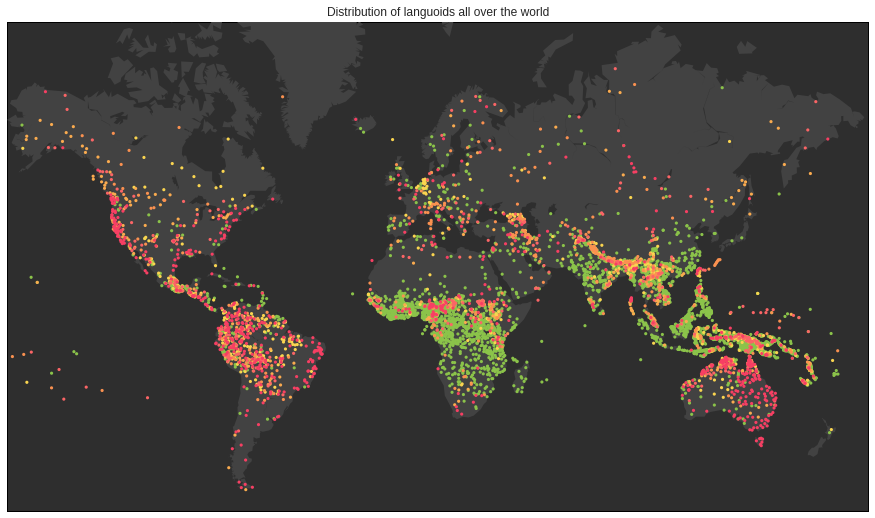

In [12]:
fig = plt.figure(figsize=(16,9))
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, resolution='c')
m.drawmapboundary(fill_color= sea_color, zorder= 0);
m.fillcontinents(color= cont_color, zorder = 1);

for i in range(len(areas)):
    x, y = m(status_v[i]['longitude'].values,
             status_v[i]['latitude'].values)
    m.scatter(x, y,
              zorder=2,
              alpha =1,
              c = status_c[i],
              edgecolors= 'none',
              s = 10);
plt.title("Distribution of languoids all over the world");